# Classification of the winner of the round in the CS GO match

## Подключение модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Загрузка данных

In [2]:
df = pd.read_csv("datasets/Classification of the winner of the round in the CS GO match/train.csv")

In [3]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,de_inferno,False,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,de_dust2,False,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,de_overpass,False,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,de_nuke,True,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,de_mirage,False,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


__id__ -  Идентификатор.

__time_left__ -  Оставшееся время до конца текущего раунда.

__ct_score__ - 	Текущий счёт команды CT.

__t_score__ - 	Текущий счёт команды T.

__map__ -	Карта матча

__bomb_planted__ -	Наличие заложенной бомбы.

__ct_health-Общее__ - количество очков здоровья команды CT.

__t_health__ - Общее количество очков здоровья команды T.	

__ct_armor__ - Общее количество очков брони команды CT.	

__t_armor__ -	Общее количество очков брони команды T.	

__ct_money__ -	Общее количество денег команды CT.	

__t_money__ - 	Общее количество денег команды T.	

__ct_helmets__ - 	Общее число шлемов в команде CT.	

__t_helmets__ -	Общее число шлемов в команде T.	

__ct_defuse_kits__ -	Общее число наборов сапёра в команде CT.

__ct_players_alive__ -	Количество живых игроков в команде CT.	Диапазон от 0 до 5.

__t_players_alive__ -	Количество живых игроков в команде T.	Диапазон от 0 до 5.

__ct_weapon_X__ - 	Общее число оружия X в команде CT.	Пример: AK-47, Deagle, AWP.

__t_weapon_X__ - 	Общее число оружия X в команде T.	Пример: AK-47, Deagle, AWP.

__ct_grenade_X__ - 	Общее число гранат X в команде CT.	Пример: дымовая, светошумовая, осколочная.

__t_grenade_X__ - 	Общее число гранат X в команде T.	Пример: дымовая, светошумовая, осколочна-.

__target__ - 	Победитель раунда.	CT = команда контр-террористов, T - команда террористов.

## Разведочный анализ данных

In [4]:
df.shape

(82014, 97)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

Пропущенных значений не наблюдается

Приведём все признаки типа float в int, так как подразумевается количество купленного оружия, гранат и т.д. на каждую команду

In [6]:
float_columns = [
    'ct_score', 't_score', 'ct_health',
    't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
    't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
    'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
    'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
    'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
    't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
    'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
    't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
    'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
    'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
    'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
    'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
    'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
    'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
    't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
    'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
    't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
    'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
    't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
    'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
    't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
    't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
    'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
    't_grenade_flashbang', 'ct_grenade_smokegrenade',
    't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
    't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
    't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
    't_grenade_decoygrenade'
]
df[float_columns] = df[float_columns].astype(int)
df.sample()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
46619,157.81,16,17,de_mirage,False,500,500,200,400,68200,...,4,2,4,2,0,0,4,0,0,T


In [7]:
df.duplicated().sum()

2860

В наборе данных имеются дубликаты, но учитывая особенность набора данных, они не являются "лишними", ведь каждый матч игроки начинают с одинаковым набором ресурсов и повторения ожидаемы

In [8]:
no_weapon_columns = ['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 
                     't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'target']
df[no_weapon_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
time_left,82014.0,98.015517,54.418579,0.01,54.92,94.91,166.93,175.0
ct_score,82014.0,6.701112,4.762211,0.00,3.00,6.00,10.00,32.0
t_score,82014.0,6.773319,4.806576,0.00,3.00,6.00,10.00,33.0
ct_health,82014.0,412.824591,131.745622,1.00,352.00,500.00,500.00,500.0
t_health,82014.0,402.988051,139.830286,0.00,322.00,500.00,500.00,600.0
ct_armor,82014.0,314.445729,171.023084,0.00,194.00,378.00,486.00,500.0
t_armor,82014.0,298.464433,174.583765,0.00,174.00,334.00,468.00,500.0
ct_money,82014.0,9770.425781,11181.916111,0.00,1300.00,5450.00,14600.00,80000.0
t_money,82014.0,11209.450216,12145.102354,0.00,1550.00,7100.00,17950.00,80000.0
ct_helmets,82014.0,2.053601,1.842050,0.00,0.00,2.00,4.00,5.0


В столбце t_health имеется значение в 600 ед здоровья, что является выбросом, так же как и 6 живых игроков в t_players_alive

Более 75% игроков выживали в конце раунда, что не является нормальным показателем.

Большинство раундом играется с счётом меньше 10, что следует из стандартной длительности матча (до 16 победы). Если счёт оказался равный следует овертайм (overtime) (дополнительное время)

Средний баланс терористов больше чем контр терористов

In [9]:
df[no_weapon_columns][df[no_weapon_columns]["t_health"] > 500]

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,target
26726,175.0,0,0,de_vertigo,False,400,600,0,0,3200,4800,0,0,0,4,6,T


In [10]:
# Так так это единичный случай, просо удалим его
df.drop(26726, inplace=True)
df.reset_index(inplace=True)
df.shape

(82013, 98)

Список карт

In [11]:
df["map"].unique()

array(['de_inferno', 'de_dust2', 'de_overpass', 'de_nuke', 'de_mirage',
       'de_train', 'de_vertigo', 'de_cache'], dtype=object)

## Двумерный анализ признаков

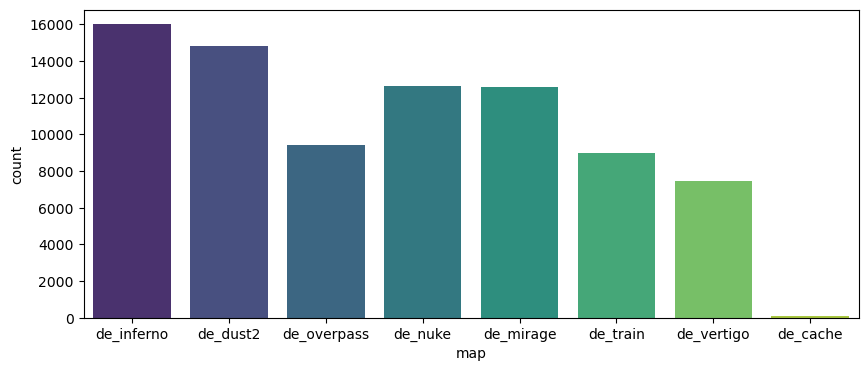

In [12]:
plt.figure(figsize=(10, 4))
plt.xticks(rotation=0)
sns.countplot(x='map', data=df, palette='viridis');

Большинство раундов было сыграно на картах inferno и dust 2. На карте cache было сыграно мало раундов.

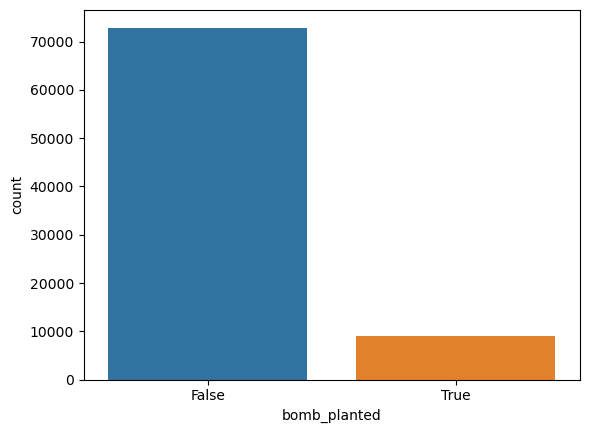

In [13]:
sns.countplot(x='bomb_planted', data=df);

Бомбу устанавливали в малой части раундов, примерно 10000 раз

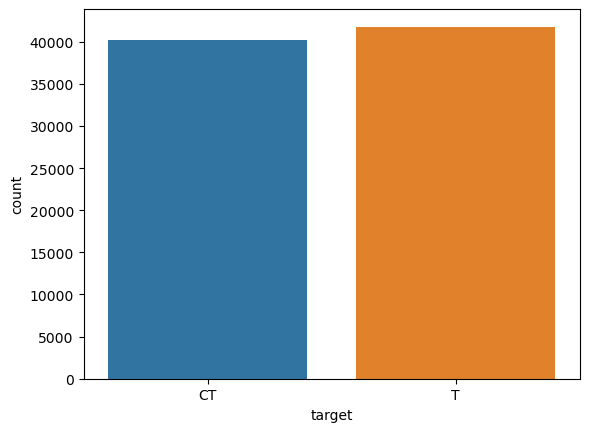

In [14]:
sns.countplot(data=df, x='target')
plt.show()

Обе команды в нашем набора данных побеждают в равном количестве

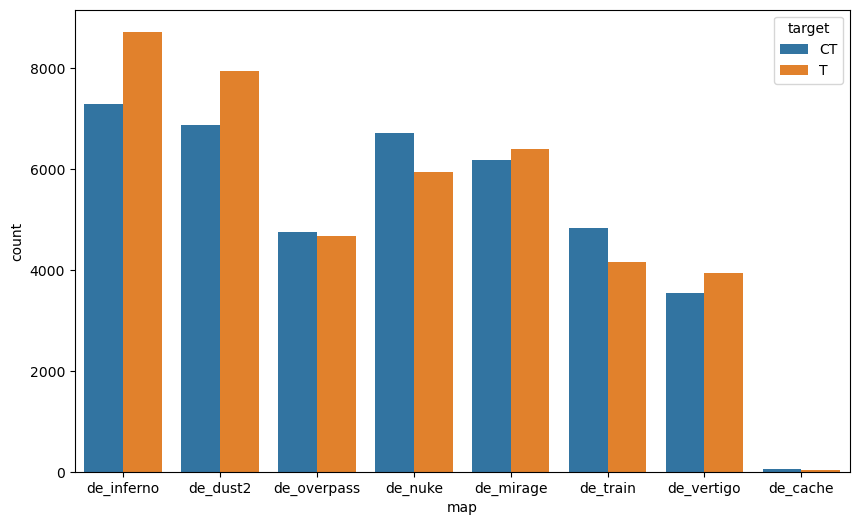

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="map", hue="target", data=df)
plt.show()

На данном графике видно, что от карты зависит вероятность победы той или иной команды

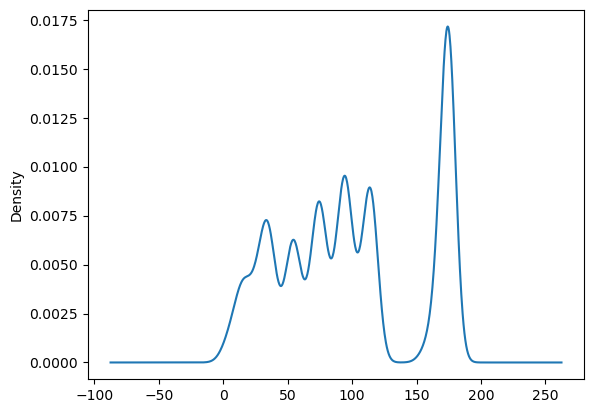

In [16]:
df['time_left'].plot.density();

Около 25% матчей закончились в самом начале, что не является нормой.

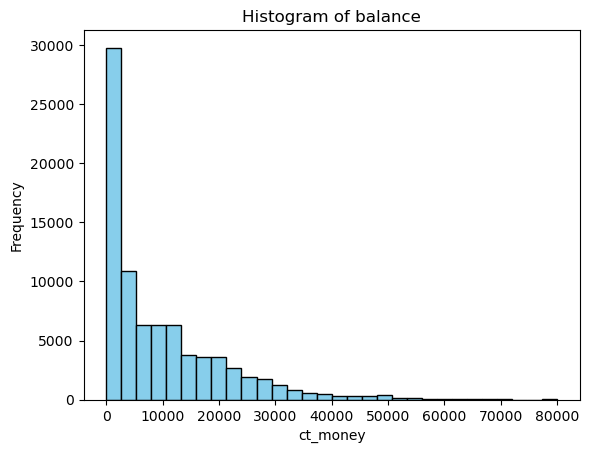

In [17]:
plt.hist(df['ct_money'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('ct_money')
plt.ylabel('Frequency')
plt.title('Histogram of balance')
plt.show()

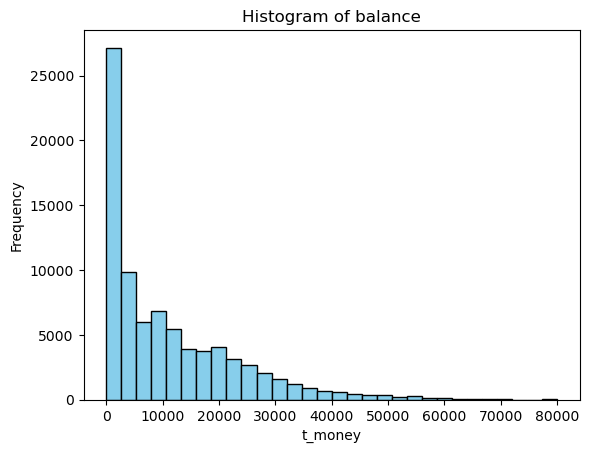

In [18]:
plt.hist(df['t_money'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('t_money')
plt.ylabel('Frequency')
plt.title('Histogram of balance')
plt.show()

Средний баланс обоих команд не более 25000

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['map'] = labelencoder.fit_transform(df['map'])
df['bomb_planted'] = labelencoder.fit_transform(df['bomb_planted'])
df['target'] = labelencoder.fit_transform(df['target'])

Закодировали строковые значения:
- target: T - 0, CT - 1
- bomb_planted: False - 0, True - 1
- map: 0-7

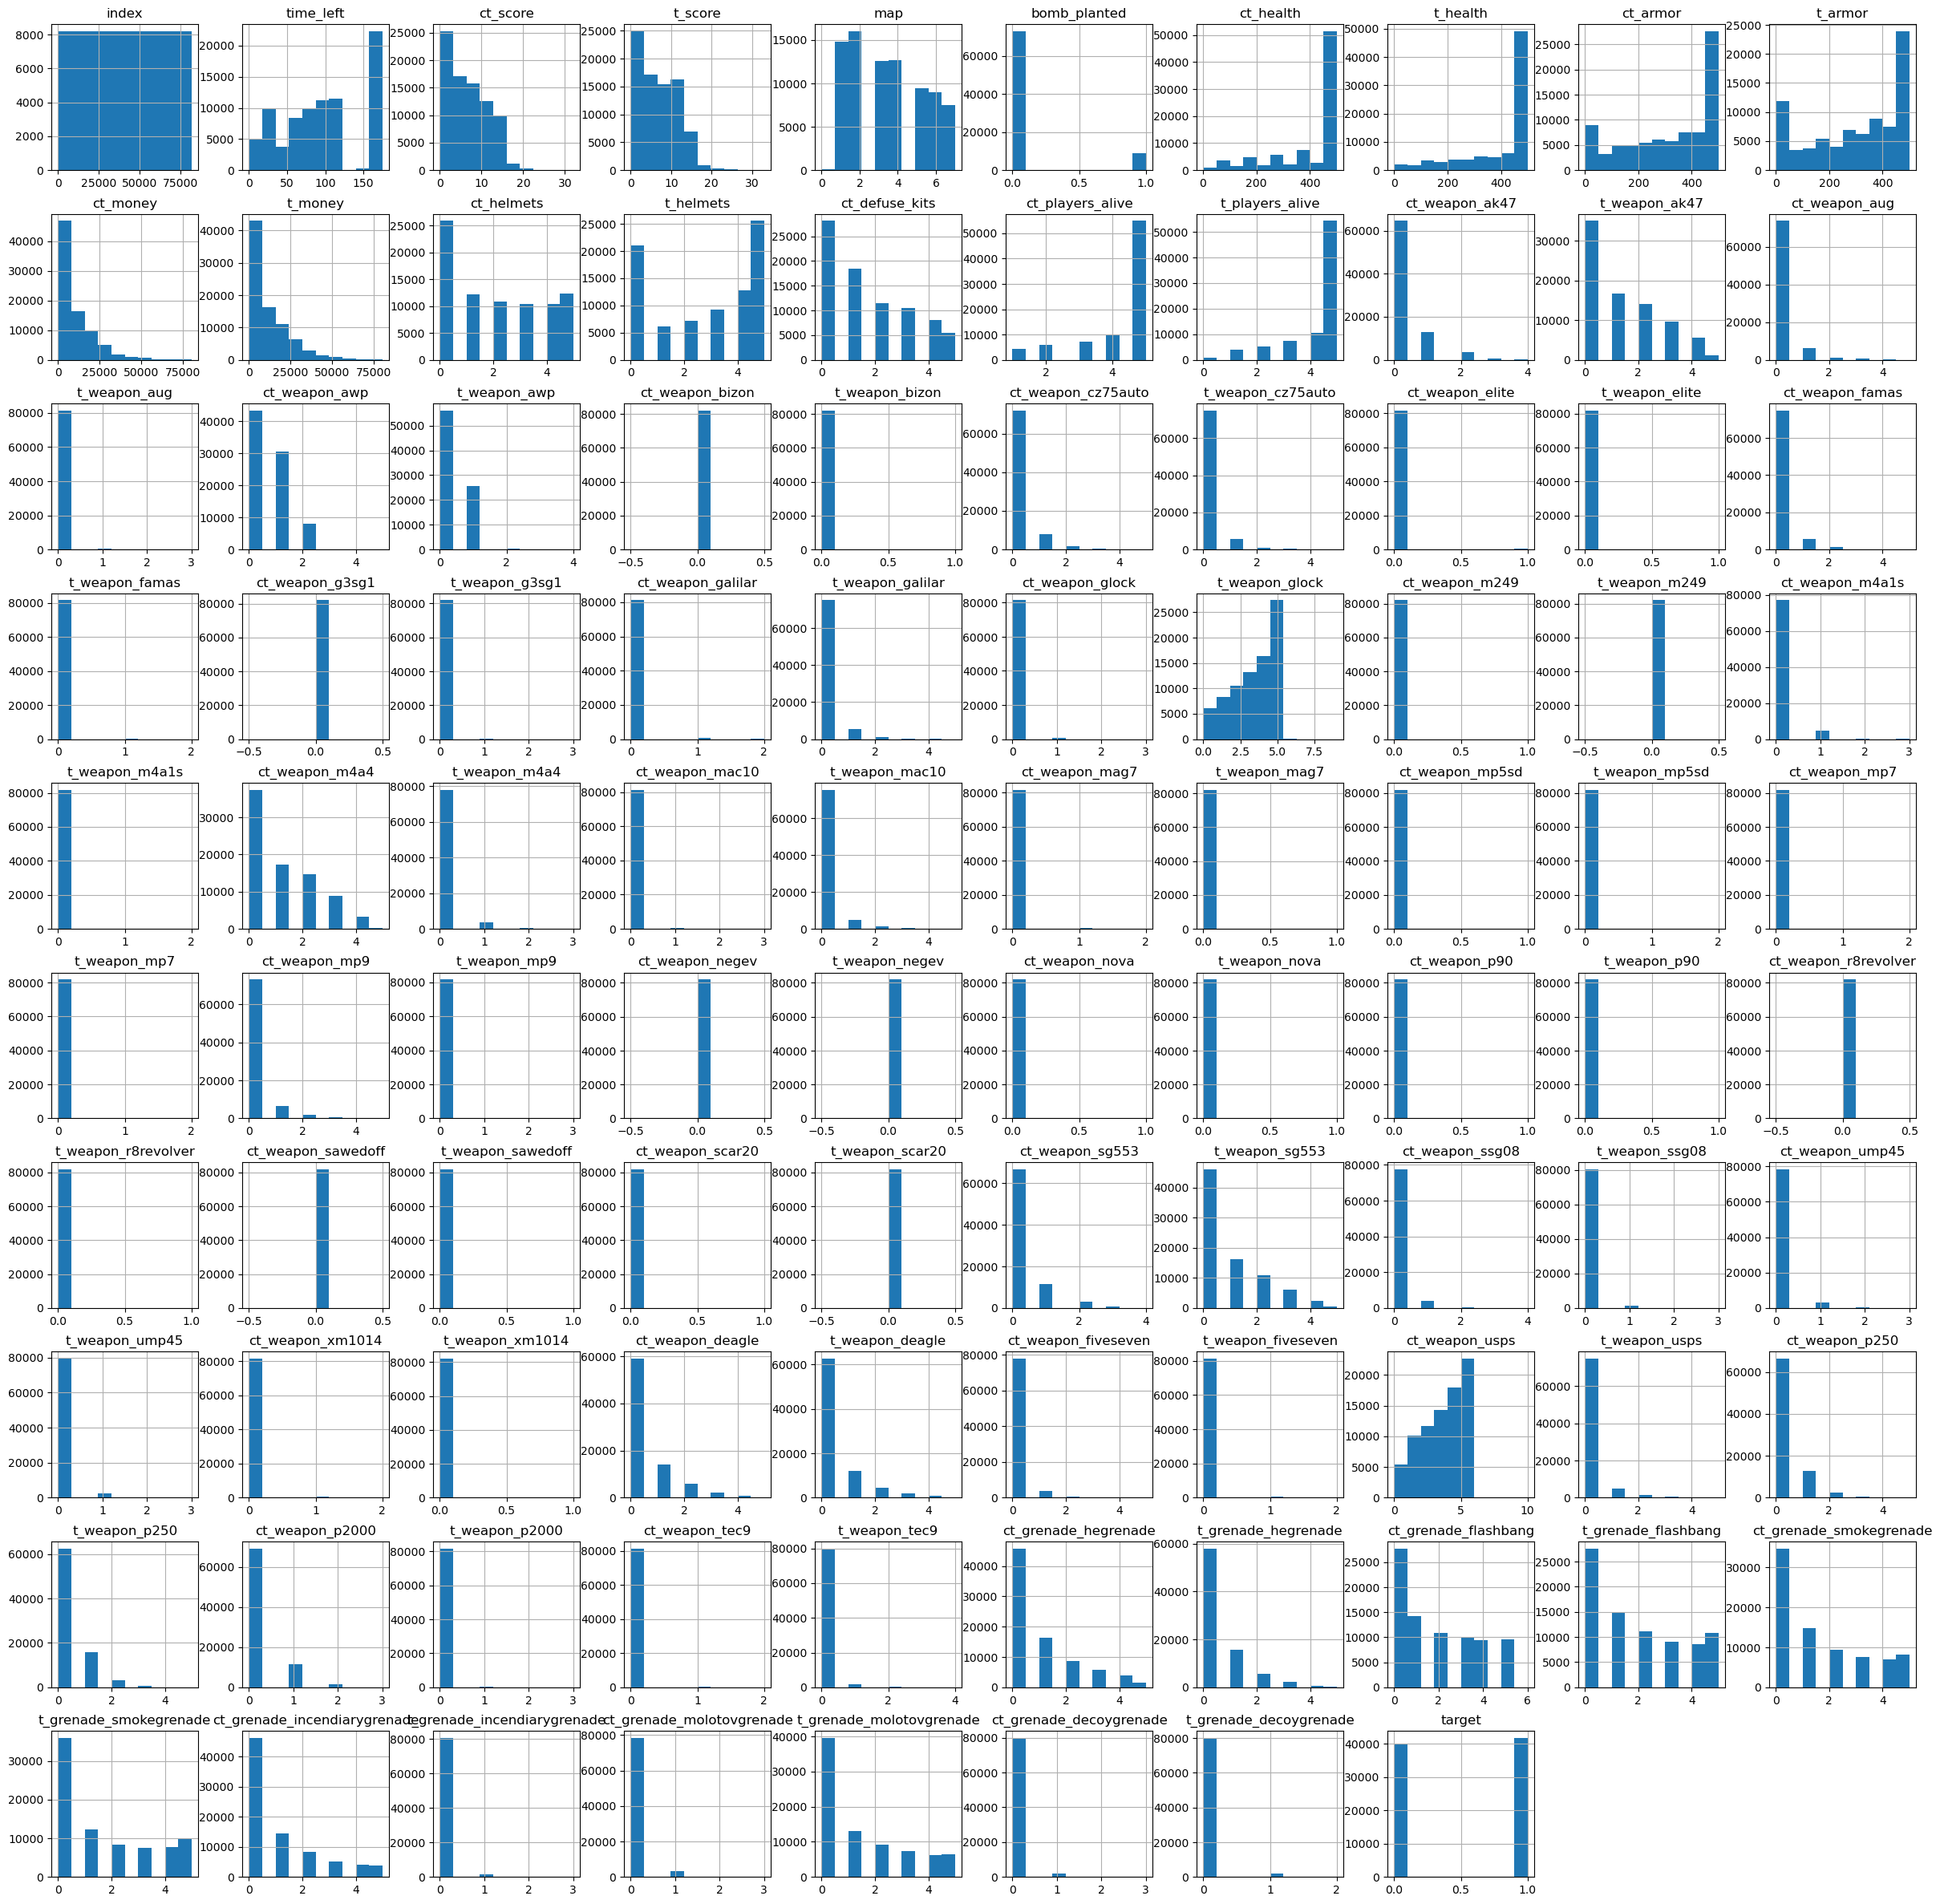

In [20]:
df.hist(figsize=(30, 30));

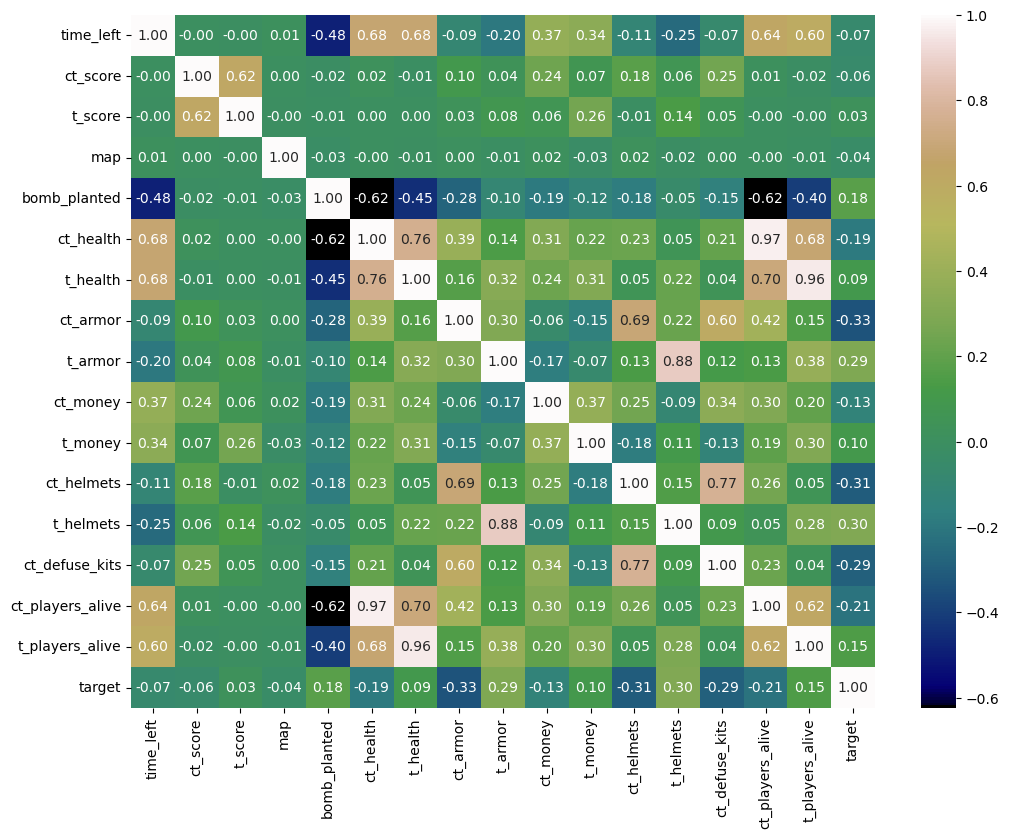

In [21]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df[no_weapon_columns].corr(), annot=True, ax=ax, cmap='gist_earth', fmt = '0.2f')
plt.show()

Количество здоровья практически напрямую зависит от количества живых игроков.

Зачастую, бомбу устанавливают при малом количестве живих игроков, и малом оставшемся времени.

Чем дольше шёл раунд, тем больше оставшихся живих игроков.

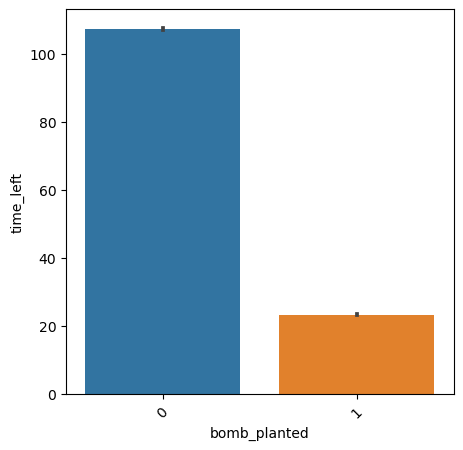

In [22]:
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x="bomb_planted", y="time_left", data=df)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

В среднем, бомбу закладывают под конец раунда.

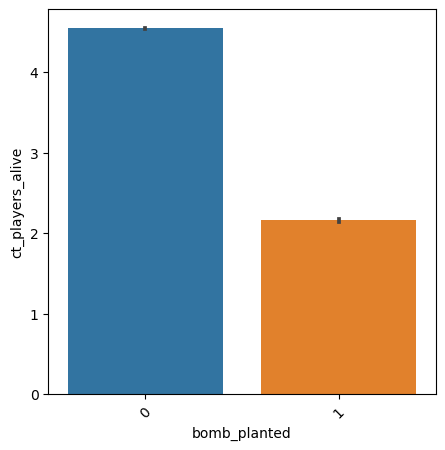

In [23]:
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x="bomb_planted", y="ct_players_alive", data=df)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

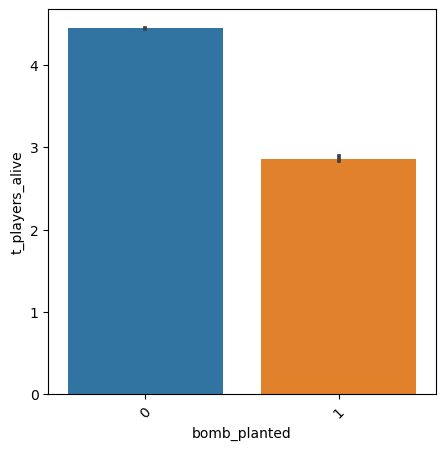

In [24]:
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x="bomb_planted", y="t_players_alive", data=df)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

В среднем, бомбу закладывают, когда остаётся 2 контр-террориста и 3 террориста

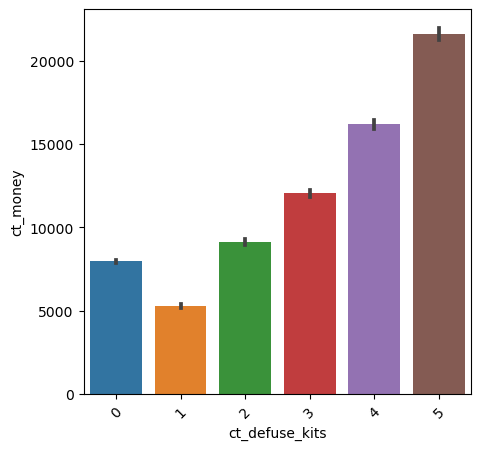

In [25]:
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x="ct_defuse_kits", y="ct_money", data=df)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

Чем больше денег у команды контр-террористов, тем больше наборов обезвреживания покупается на команду.

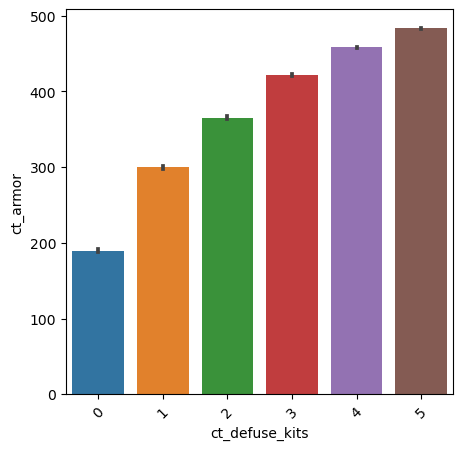

In [26]:
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x="ct_defuse_kits", y="ct_armor", data=df)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

3 набора дифузов и более (ct_defuse_kits) в среднем берётся только если есть броня у всей команды. Тоесть броня приоритетней дифузов

## Моделирование

Выделяем признаки для обучения. ct_helmets, t_helmets, ct_health и t_health брать не будем, так так они сильно зависят от ct_armor, t_armor, ct_players_alive, t_players_alive соответственно, и будут снижать точность моделей. Так же не возьмём time_left, так как оно имеет кривое распределение и так же снижает точность моделей.

In [27]:
features_names = ['ct_score', 't_score', 'map', 'bomb_planted', 
                  'ct_armor', 't_armor', 'ct_money', 't_money', 
                  'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
                  'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
                  'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
                  'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
                  't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
                  'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
                  't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
                  'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
                  'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
                  'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
                  'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
                  'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
                  'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
                  't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
                  'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
                  't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
                  'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
                  't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
                  'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
                  't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
                  't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
                  'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
                  't_grenade_flashbang', 'ct_grenade_smokegrenade',
                  't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
                  't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
                  't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
                  't_grenade_decoygrenade']

X = df[features_names]
print(X.shape)

(82013, 91)


Выделяем таргетированный признак

In [28]:
y = df["target"]
y.value_counts()

target
1    41788
0    40225
Name: count, dtype: int64

Импортируем модули для обучения моделй

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Разделяем выборку на обучающую и тестовую 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [31]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(54948, 91) (27065, 91) (54948,) (27065,)


## Обучение моделей

### KNeighborsClassifier

In [33]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

CPU times: total: 15.6 ms
Wall time: 16 ms


In [34]:
%%time
knn_pred_test = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred_test, normalize=True)
print(f'test accuracy: {knn_accuracy}')

test accuracy: 0.7242194716423425
CPU times: total: 1min 26s
Wall time: 42.1 s


### Gaussian Naive Bayes

In [35]:
%%time
gnb = GaussianNB()
gnb.fit(X, y);

CPU times: total: 156 ms
Wall time: 158 ms


In [36]:
%%time
gnb_pred_test = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
print(f'test accuracy: {gnb_accuracy}')

test accuracy: 0.7316460373175688
CPU times: total: 78.1 ms
Wall time: 58 ms


### Random Forest Classifier 

In [37]:
%%time
rfc  = RandomForestClassifier(random_state = 17)
rfc.fit(X_train, y_train);

CPU times: total: 15.9 s
Wall time: 16.2 s


In [38]:
%%time
rfc_pred_test = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
print(f'test accuracy: {rfc_accuracy}')

test accuracy: 0.8510992056161094
CPU times: total: 1.5 s
Wall time: 1.57 s


### Logistic Regression

In [39]:
%%time
lr = LogisticRegression(random_state = 17)
lr.fit(X_train, y_train);

CPU times: total: 2.17 s
Wall time: 807 ms


In [40]:
%%time
lr_pred_test = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred_test)
print(f'test accuracy: {lr_accuracy}')

test accuracy: 0.737336042859782
CPU times: total: 15.6 ms
Wall time: 16 ms


## Метрики классификации

Построим отдельный датафрейм, где будем хранить метрики для сравнения

In [41]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay

In [42]:
log = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-score", "ROC AUC Score"])
log["Classifier"] = ["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

log["Precision"] = [
    precision_score(y_test, knn_pred_test),
    precision_score(y_test, gnb_pred_test),
    precision_score(y_test, rfc_pred_test),
    precision_score(y_test, lr_pred_test)
]

log["Recall"] = [
    recall_score(y_test, knn_pred_test),
    recall_score(y_test, gnb_pred_test),
    recall_score(y_test, rfc_pred_test),
    recall_score(y_test, lr_pred_test)
]

log["F1-score"] = [
    f1_score(y_test, knn_pred_test),
    f1_score(y_test, gnb_pred_test),
    f1_score(y_test, rfc_pred_test),
    f1_score(y_test, lr_pred_test)
]

log["ROC AUC Score"] = [
    roc_auc_score(y_test, knn_pred_test),
    roc_auc_score(y_test, gnb_pred_test),
    roc_auc_score(y_test, rfc_pred_test),
    roc_auc_score(y_test, lr_pred_test)
]

log.set_index("Classifier", inplace=True)
log.sort_values("F1-score", inplace=True)

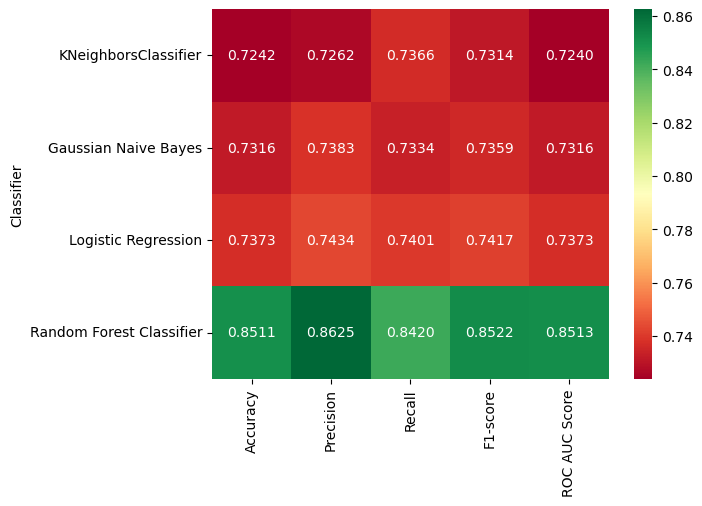

In [43]:
sns.heatmap(log, annot=True, fmt=".4f", cmap="RdYlGn");

Тепловая карта для наглядного сравнения различных моделей

### Confusion matrix & RocCurve

#### Confusion matrix & RocCurve KNN

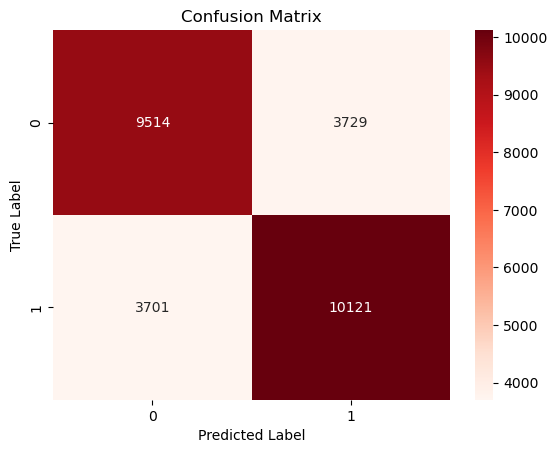

In [44]:
sns.heatmap(confusion_matrix(y_test, knn_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

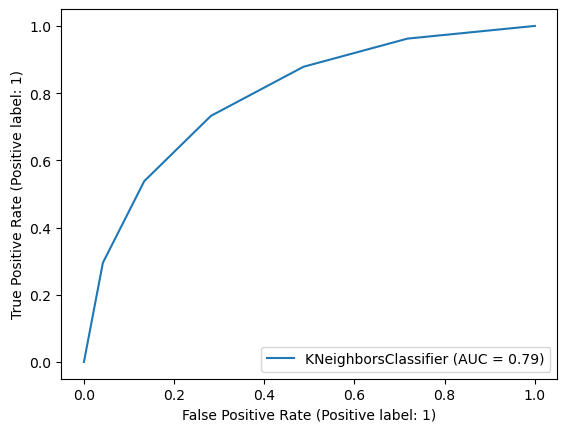

In [45]:
RocCurveDisplay.from_estimator(knn, X_test, y_test);

#### Confusion matrix & RocCurve GNB

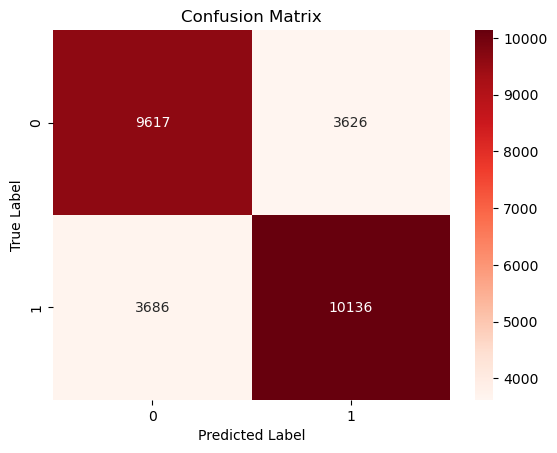

In [46]:
sns.heatmap(confusion_matrix(y_test, gnb_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

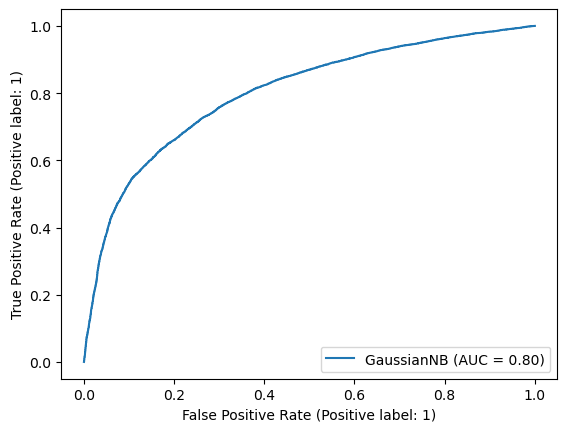

In [47]:
RocCurveDisplay.from_estimator(gnb, X_test, y_test);

#### Confusion matrix & RocCurve RFC

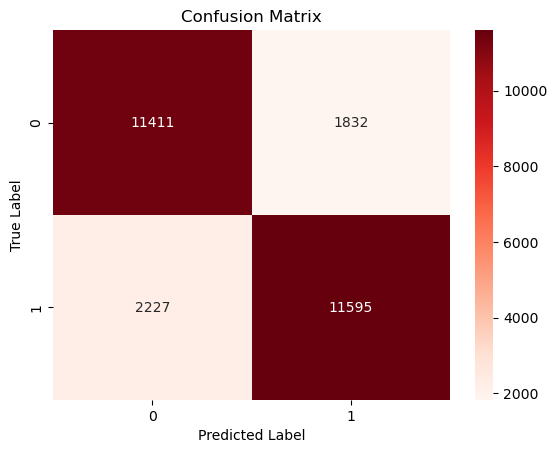

In [48]:
sns.heatmap(confusion_matrix(y_test, rfc_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

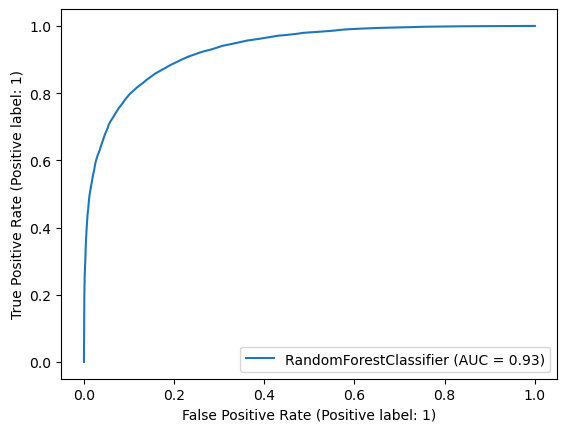

In [49]:
RocCurveDisplay.from_estimator(rfc, X_test, y_test);

#### Confusion matrix & RocCurve LR

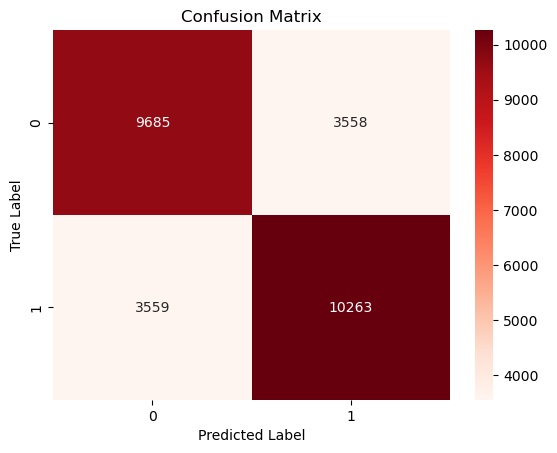

In [50]:
sns.heatmap(confusion_matrix(y_test, lr_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

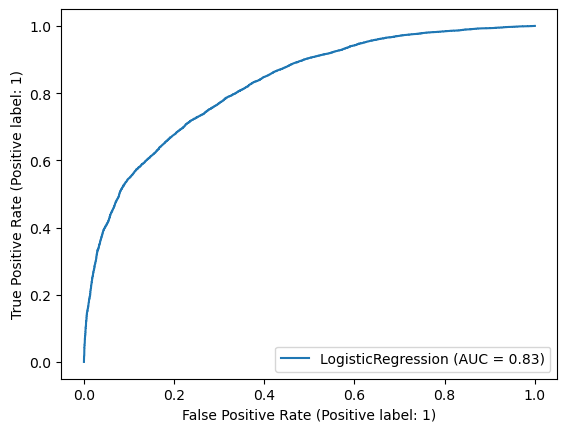

In [51]:
RocCurveDisplay.from_estimator(lr, X_test, y_test);

## Настройка гиперпараметров

Лучшей моделей оказалсь rfc, подберём оптимальное кол-во деревьев

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
%%time
rfc_upgrade = RandomForestClassifier(random_state = 17)
param_grid = {'n_estimators': [100, 150, 300, 600, 1200]}

grid_search = GridSearchCV(estimator=rfc_upgrade, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_estimators': 1200}
CPU times: total: 25min 11s
Wall time: 25min 12s


Лучшим значением n_estimators из списка 100, 150, 300, 600, 1200 оказалось 1200, но большие значения брать не будем, так как это займёт очень много времени и не принесёт значимого результата

In [54]:
%%time
rfc_upgrade = RandomForestClassifier(n_estimators=1200)
rfc_upgrade.fit(X_train, y_train);

CPU times: total: 2min 55s
Wall time: 2min 55s


In [55]:
%%time
rfc_upgrade_pred = rfc_upgrade.predict(X_test)

CPU times: total: 12.1 s
Wall time: 12 s


Confusion Matrix rfc:

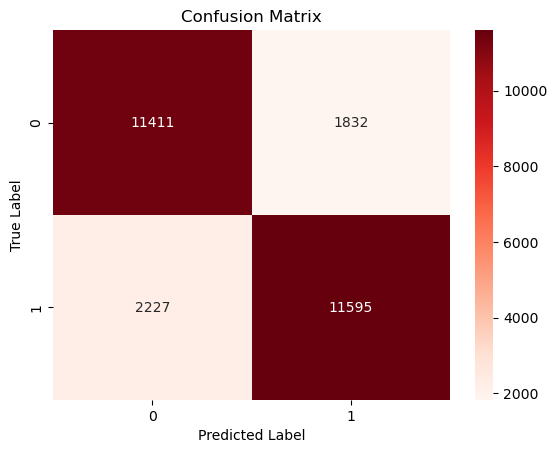

In [56]:
sns.heatmap(confusion_matrix(y_test, rfc_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrix rfc_upgrade:

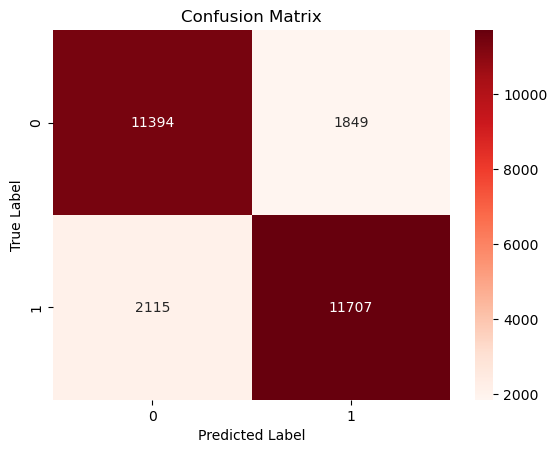

In [57]:
sns.heatmap(confusion_matrix(y_test, rfc_upgrade_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
log.loc["Random Forest Classifier Upgraded"] = [
    accuracy_score(y_test, rfc_upgrade_pred),
    precision_score(y_test, rfc_upgrade_pred),
    recall_score(y_test, rfc_upgrade_pred),
    f1_score(y_test, rfc_upgrade_pred),
    roc_auc_score(y_test, rfc_upgrade_pred)
]

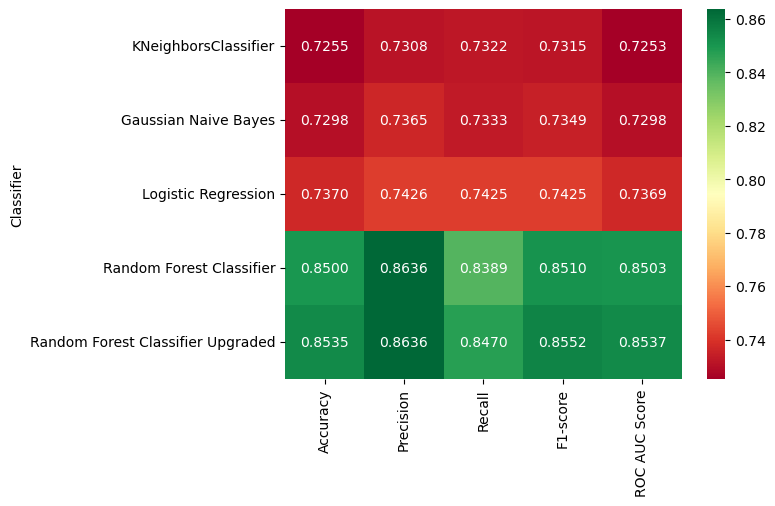

In [59]:
sns.heatmap(log, annot=True, fmt=".4f", cmap="RdYlGn");

## Вывод

Максимальное оставшееся время до конца раунда состовляет 175 секунд, что является максимальным теоерически возможным показателем (стандартное время раунда 115 секунд + 60 секунд доп время за попытку спасения заложника). Однако не на одной из присутствующих карт нет заложников, как и нет никой информации о них в наборе данных. Из зачего время в 175 секунд не является нормальным

Более 75% раунов закончились с 8 живими игроками, что очено много. Так же нет ни 1 раунда, в котором погибли все контр-террористы.
В среднем, бомбу закладывают под конец раунда, когда остаётся 2 контр-террориста и 3 террориста.
Чем больше денег у команды контр-террористов, тем больше наборов обезвреживания покупается на команду.
Броня приоритетней чем набор обезвреживания.

Было принято решение не брать сильно коррелирующие признаки для обученя моделей (ct_helmets, t_helmets, ct_health и t_health), так как в наборе данных есть аналогичные им признаки. А также оставшееся время до конца раунда, так как из-за не равномерного распределения данных уменьшалась точность моделей (при замене выбросов на медианное значение точность возрастала, но всё ещё хуже чем без этого признака)

Было обучено 5 моделей, самой точной оказалась Random Forest Classifier.

Подобрали оптимальное значение параметра n_estimators, что немного повысило точность модели.